# Assigment 2: CAMSHIFT
## Paper
Lies das Paper "Bradski_etal_1998_camshift.pdf" im KVV (unter "Resources"). 

## Histogramm berechnen
* Implementiere eine Funktion, die ein Farbhistogramm erstellt. Übergebe entweder ein Bild und ein ROI, oder das dem ROI unterliegende Bild. 
* Hierzu ermögliche durch die Übergabe eines zweiten (bzw. dritten) Parameters die Zusammenfassung von Farbwerten in n Bins. 
* Lade das Bild "images/racecar.png" und konvertiere das Bild in den HSV-Farbraum. Plotte den Hue-Kanal. (**RESULT**)

4.0


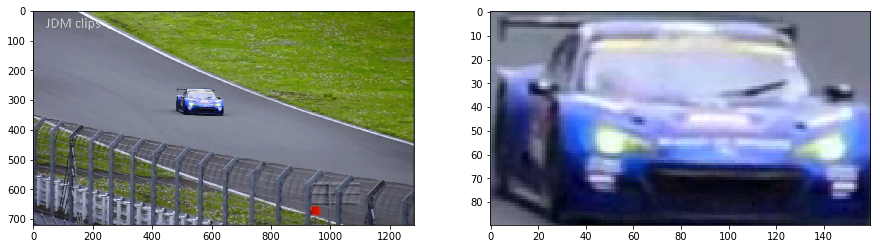

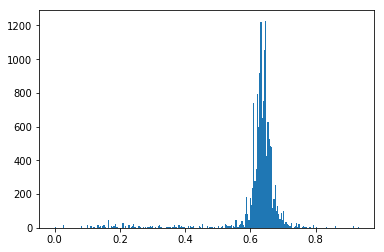

In [66]:
# dieser Code wurde als Musterlösung von Tobias Schülke zur Verfügung gestellt und von Tim renoviert

%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')

IMAGES_PER_ROW = 4

MIN_SATURATION_CAR = 0.2
MIN_VALUE_CAR = 0.5
MIN_SATURATION_TACO = 0.8
MIN_VALUE_TACO = 0.2

ROI_FRAME_MARGIN_CAR = 60
ROI_FRAME_MARGIN_TACO = 20

image = io.imread('images/racecar.png')
imageCar = image[260:350, 480:640]

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
# ...

ax1.imshow(image)
ax2.imshow(imageCar)

# ...

imageCarHSV = color.rgb2hsv(imageCar)

def createColorHistogram(img, binCount = 256, out = plt):
    colors = []
    for y in range (0, img.shape[1]):
        for x in range (0, img.shape[0]):
            colors.append(img[x,y,0])
    return out.hist(colors, binCount)[0]


plt.figure(2)
x = createColorHistogram(imageCarHSV)
print(x[255])

* stelle das Histogramm über dem Hue-Kanal für das gesamte Bild und für den Ausschnitt (x,y) = (480, 260) bis (640, 350) dar. Variiere auch mal testweise die Zahl der Bins(**RESULT**)


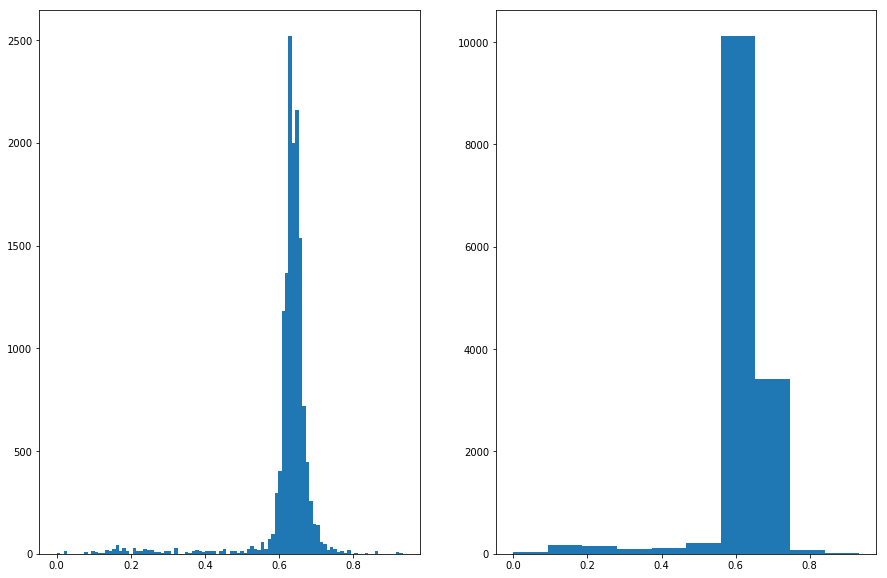

In [67]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
    
histCar100 = createColorHistogram(imageCarHSV, 100, ax1)
histCar10 = createColorHistogram(imageCarHSV, 10, ax2)


## Wahrscheinlichkeitsverteilung
* implementiere die Methode aus der Vorlesung, die Dir - gegeben ein Hue-Histogramm - die Objekt-Wahrscheinlichkeitsverteilung für ein neues Bild berechnet. 
* erzeuge das Histogramm des Autos aus dem Bild "racecar.png" und wende die neue Funktion auf das letzte frame des Videos (images/racecar/151.jpg) an (**RESULT**)

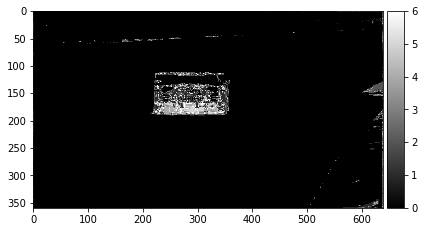

In [65]:
# Tip: in der Nacht sind alle Katzen grau ;)

def createProbDistribution(image, objectHist, nbins, minSaturation, minValue):
    histTotal = np.sum(objectHist)
    probs = np.zeros_like(image[:, :, 0], dtype=float)
    for y in range (0, image.shape[1]):
        for x in range (0, image.shape[0]):
            greyValue = int(round(image[x,y,0] * 256))
            objectHistIndex = int(round(greyValue/nbins))
            if objectHistIndex > nbins:
                objectHistIndex = nbins
            amount = objectHist[objectHistIndex]
            probs[x,y] = int(round(amount/histTotal*256))
            
    return probs


binCount = 128
lastFrame = io.imread('images/racecar/151.jpeg')
histogramCar = createColorHistogram(imageCar, binCount, ax1)
probDistr = createProbDistribution(lastFrame, histogramCar, binCount, MIN_SATURATION_CAR, MIN_VALUE_CAR)
io.imshow(probDistr, cmap='gray')


### ROI auf Bild anzeigen


In [13]:
def drawROI(image, x, y, width, height, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    
    out.imshow(image)

# showRoiFrame(image, 480, 260, 160, 90)

##  Exercise 1.2 - Mean Shift
* Implementiere die Verschiebung und des ROI wie in der Vorlesung beschrieben. Teste den Algorithmus auf den Bildfolgen "images/racecar/*.jpg" oder "images/taco/*.jpg". Wähle das Tracking-Fenster geeignet (zur Reduktion der Dateigröße habe ich die Bilder um Faktor 2 verkleinert, d.h. die ROI von oben muss entsprechend angepasst werden). 
* Zeichne als Ausgabe die Trajektorie (die Bewegungsspur) der Objekte, wie durch CAMSHIFT zurückgegeben. (**RESULT**)

##  Exercise 1.2 - CAMSHIFT
* erweitere Deinen Algorithmus um die Anpassung der Größe des ROI und das Finden der Objektorientierung
* führe den Algorithmus wieder auf eine der Bildfolgen aus und zeichne eine Ellipse auf das Bild, die die gefundenen Parameter repräsentiert (**RESULT**)